In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('best-selling-books.csv')

In [5]:
# Display the first few rows of the DataFrame
print(df.head())

                                       Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   

  Original language  First published  Approximate sales in millions  \
0           English             1859                          200.0   
1            French             1943                          200.0   
2           English             1997                          120.0   
3           English             1939                          100.0   
4           Chinese             1791                          100.0   

                Genre  
0  Historical fiction  
1             Novella  
2             Fantasy  
3             Mystery  
4         Fami

In [6]:
# Get an overview of the columns and their data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB
None


In [7]:
# Compute summary statistics for numerical columns
print(df.describe())

       First published  Approximate sales in millions
count       174.000000                     174.000000
mean       1962.522989                      30.097126
std          64.268737                      27.957985
min        1304.000000                      10.000000
25%        1947.000000                      14.000000
50%        1974.000000                      20.000000
75%        1995.000000                      36.300000
max        2018.000000                     200.000000


In [8]:
# Filter the DataFrame to retrieve only the book names with missing genre values
missing_genre_books = df['Book'][df['Genre'].isnull()]

# Other possible alternative
# missing_genre_books = df.loc[df['Genre'].isnull(), 'Book']

# Display the book names with missing genre values
print(missing_genre_books)

85                                  The Bermuda Triangle
110                                  The Horse Whisperer
115                                        The Outsiders
116                            Guess How Much I Love You
117                                               Shōgun
118                                The Poky Little Puppy
120                                 Perfume (Das Parfum)
121                                  The Grapes of Wrath
122        The Shadow of the Wind (La sombra del viento)
123                              Interpreter of Maladies
124                                             Becoming
126                                 Tuesdays with Morrie
127                                    God's Little Acre
128       Follow Your Heart (Va' dove ti porta il cuore)
129                                    A Wrinkle in Time
130                                 Long Walk to Freedom
131                              The Old Man and the Sea
132                            

In [9]:
# Fill missing values in 'Genre' column with 'Other'
df['Genre'] = df['Genre'].fillna('Other')

# Verify the updated DataFrame
print(df['Genre'])

0      Historical fiction
1                 Novella
2                 Fantasy
3                 Mystery
4             Family saga
              ...        
169                 Other
170                 Other
171                 Other
172                 Other
173                 Other
Name: Genre, Length: 174, dtype: object


In [10]:
# Check for missing values in 'Genre' column
missing_values = df['Genre'].isnull().sum()

if missing_values == 0:
    print("No missing values in the 'Genre' column.")
else:
    print("There are still missing values in the 'Genre' column.")
    print(f"Number of missing values: {missing_values}")

No missing values in the 'Genre' column.


In [11]:
# Recheck the dataset for missing values
missing_values = df.isnull().any()

if missing_values.any():
    print("There are missing values in the dataset.")
    print("Columns with missing values:")
    print(missing_values[missing_values].index.tolist())
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [15]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [16]:
# Compute additional statistical measures
sales_mean = df['Approximate sales in millions'].mean()
sales_median = df['Approximate sales in millions'].median()
sales_std = df['Approximate sales in millions'].std()

print("Mean sales:", sales_mean)
print("Median sales:", sales_median)
print("Standard deviation of sales:", sales_std)

Mean sales: 30.097126436781608
Median sales: 20.0
Standard deviation of sales: 27.95798546448718


In [17]:
# how to round the values to 2 decimal places
print("Mean sales:", round(sales_mean, 2))
print("Median sales:", round(sales_median, 2))
print("Standard deviation of sales:", round(sales_std, 2))

Mean sales: 30.1
Median sales: 20.0
Standard deviation of sales: 27.96


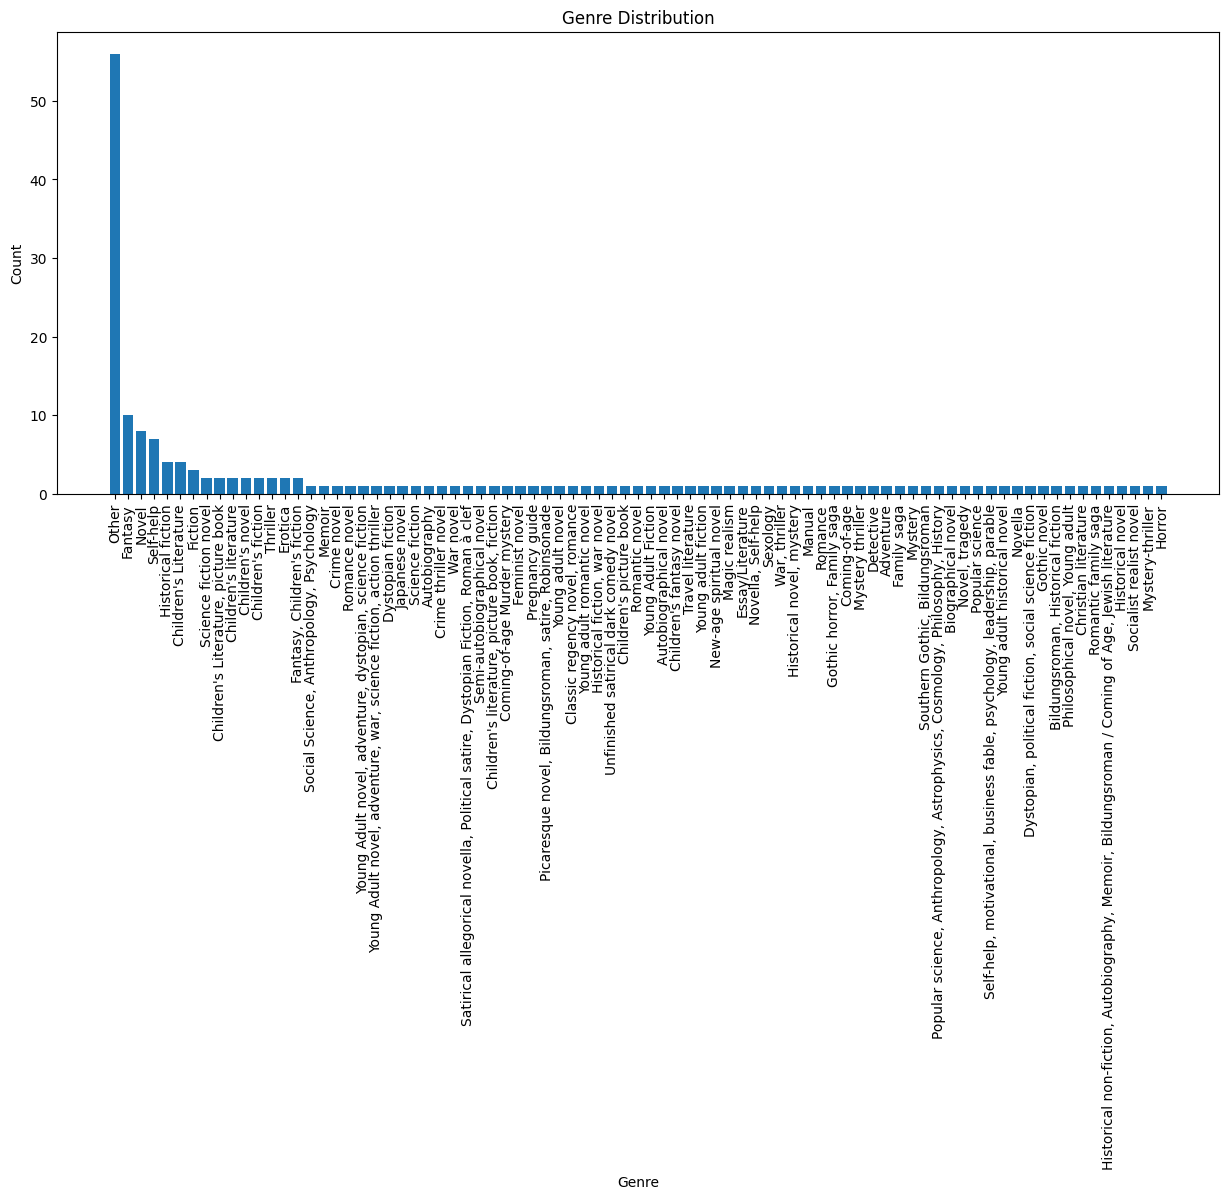

In [20]:
# Count the occurrences of each genre
genre_counts = df['Genre'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(15, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Calculate the number of books per author
books_per_author = df['Author(s)'].value_counts()

# Identify the most prolific authors
most_prolific_authors = books_per_author.head(10)

print("Top 10 Most Prolific Authors:")
print(most_prolific_authors)

Top 10 Most Prolific Authors:
Author(s)
J. K. Rowling       7
Suzanne Collins     3
Dan Brown           3
Roald Dahl          3
George Orwell       2
Erskine Caldwell    2
Ken Follett         2
Albert Camus        2
E. L. James         2
Sam McBratney       1
Name: count, dtype: int64


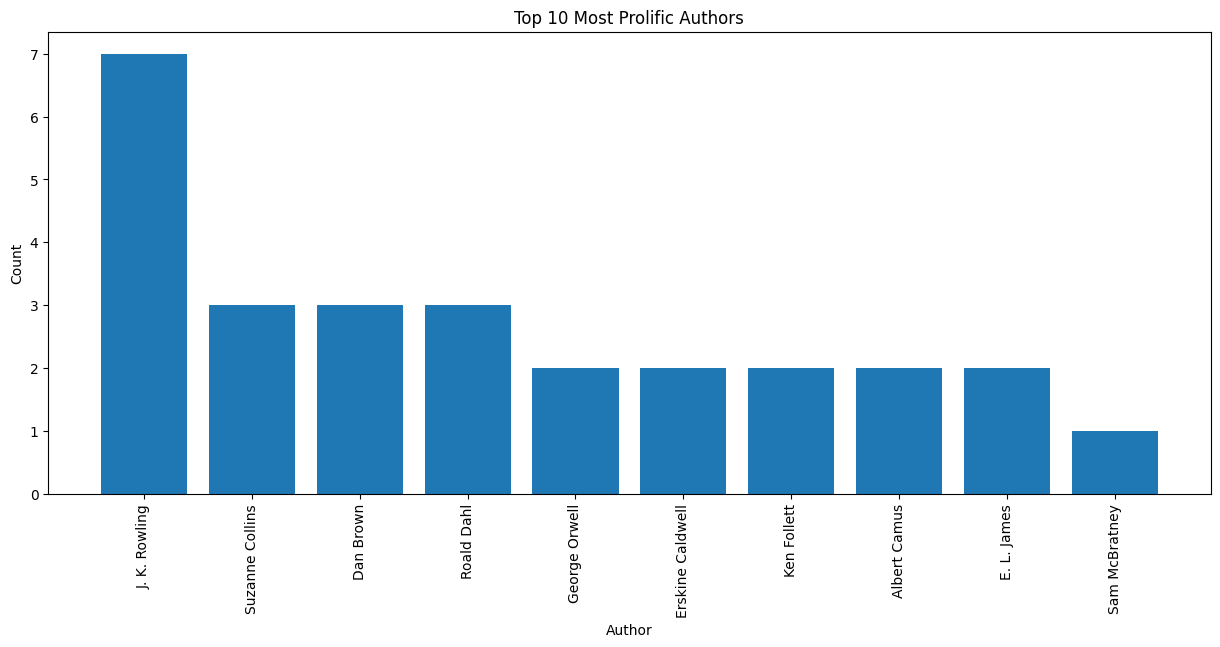

In [23]:
# Plot the most prolific authors
plt.figure(figsize=(15, 6))
plt.bar(most_prolific_authors.index, most_prolific_authors.values)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Top 10 Most Prolific Authors')
plt.xticks(rotation=90)
plt.show()

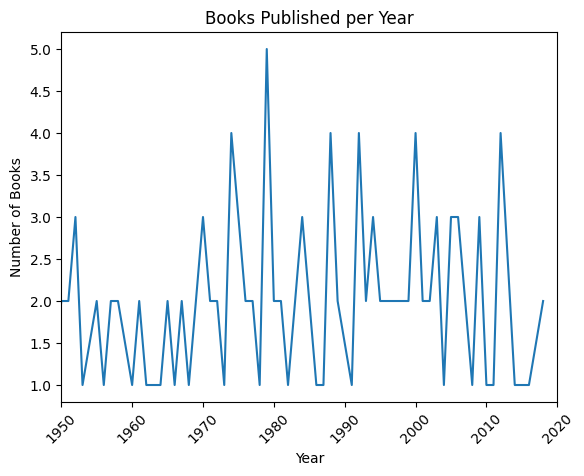

In [27]:
# Group the data by publication year and calculate the number of books published each year
books_per_year = df.groupby('First published')['Book'].count()

# Plot the number of books published per year
plt.plot(books_per_year.index, books_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Books')
# add a xlim() call to limit the x-axis range
plt.xlim(1950, 2020)
plt.title('Books Published per Year')
plt.xticks(rotation=45)
plt.show()

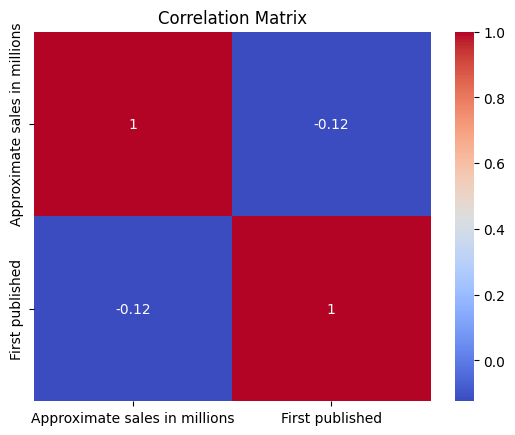

In [28]:
# Compute the correlation matrix
correlation_matrix = df[['Approximate sales in millions', 'First published']].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

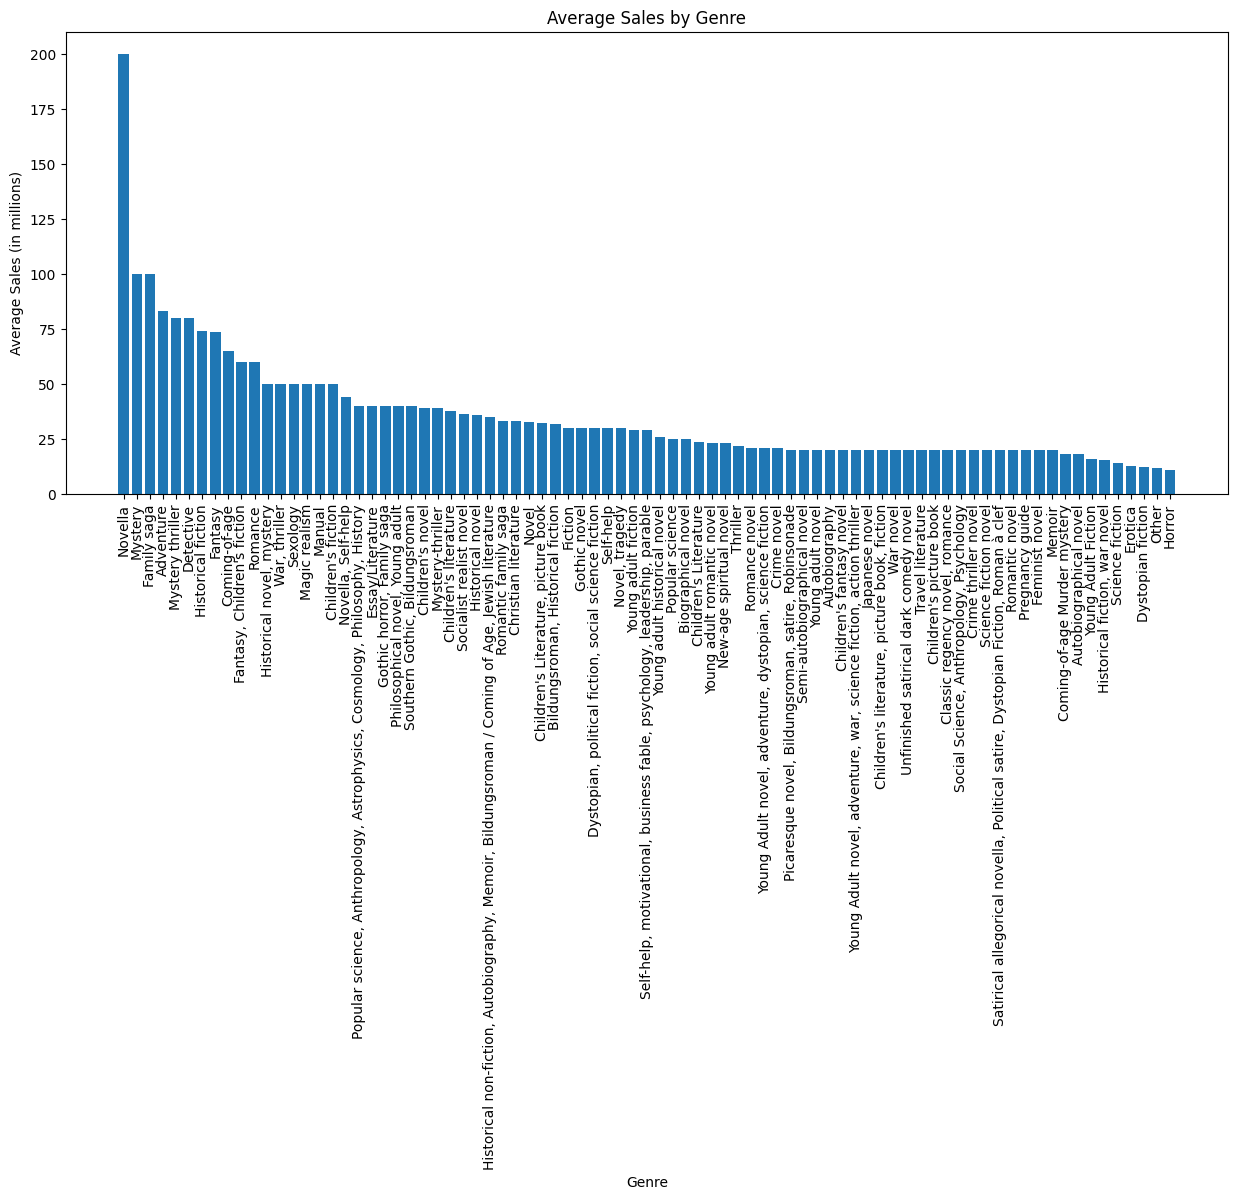

In [31]:
# Calculate the average sales for each genre
average_sales_by_genre = df.groupby('Genre')['Approximate sales in millions'].mean()

# sort the values in descending order
average_sales_by_genre = average_sales_by_genre.sort_values(ascending=False)

# Plot the average sales by genre
plt.figure(figsize=(15, 6))
plt.bar(average_sales_by_genre.index, average_sales_by_genre.values)
plt.xlabel('Genre')
plt.ylabel('Average Sales (in millions)')
plt.title('Average Sales by Genre')
plt.xticks(rotation=90)
plt.show()